<a href="https://colab.research.google.com/github/AnitaTasnim/Mentorness-ML-internship/blob/main/worldcup2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
# Load dataset from Google Drive
file_path = "/content/drive/MyDrive/mentorness/Machine Learning /CWC23_all_innings.csv"
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset loaded successfully.")
print(dataset.head())

Dataset loaded successfully.
  team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   

   wicketball_prob  runs_per_ball      opposition     ground start_date  \
0             0.05       0.750000  v South Africa    Chennai  27-Oct-23   
1             0.05       0.750000         v India    Lucknow  29-Oct-23   
2             0.05       0.800000       v England  Ahmedabad   5-Oct-23   
3             0.05       0.816667    v Bangladesh    Chennai  13-Oct-23   
4             0.05       0.816667      v Pakistan    Chennai  23-Oct-23   

   overs  mdns  econ  inns  4s  6s  sr  not_out  mins  
0   10.0   0.0   4.5     2 NaN NaN NaN      NaN   NaN  

In [4]:
dataset.head()


,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [5]:
df=dataset

In [6]:
df.nunique()

team                10
player             152
bat_or_bowl          2
bb_bf              117
runs               128
wkts                 7
wicketball_prob    129
runs_per_ball      645
opposition          10
ground              10
start_date          41
overs               38
mdns                 4
econ               230
inns                 2
4s                  20
6s                  12
sr                 429
not_out              2
mins               156
dtype: int64

#Team Performance

Team Performance Analysis using Machine Learning techniques, considering the provided columns:

- team
- runs
- wkts
- runs_per_ball
- econ

We will focus on clustering the teams based on these metrics to identify top-performing teams and their strengths.

In [7]:

# Select relevant columns for team performance analysis
team_df = df.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'runs_per_ball': 'mean',
    'econ': 'mean'
}).reset_index()

# Display the first few rows of the processed data
print(team_df.head())


  team  runs  wkts  runs_per_ball      econ
0  AFG  4134  53.0       0.855123  5.763818
1  AUS  5234  77.0       0.890978  5.661129
2  BAN  4358  51.0       0.840755  6.095769
3  ENG  4396  65.0       0.935399  6.068302
4  IND  4783  94.0       0.920735  4.963793


In [9]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           10 non-null     object 
 1   runs           10 non-null     int64  
 2   wkts           10 non-null     float64
 3   runs_per_ball  10 non-null     float64
 4   econ           10 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 528.0+ bytes


In [11]:
!pip install scikit-learn
import sklearn.preprocessing

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(team_df[['runs', 'wkts', 'runs_per_ball', 'econ']])

# Create a new DataFrame with scaled features
team_scaled_df = pd.DataFrame(scaled_features, columns=['runs', 'wkts', 'runs_per_ball', 'econ'])
team_scaled_df['team'] = team_df['team']

# Display the first few rows of the scaled data
print(team_scaled_df.head())


       runs      wkts  runs_per_ball      econ team
0 -1.309260 -1.027671      -0.743052 -0.438630  AFG
1  1.329410  0.650159      -0.142036 -0.675956  AUS
2 -0.771931 -1.167490      -0.983907  0.328544  BAN
3 -0.680777 -0.188756       0.602576  0.265064  ENG
4  0.247555  1.838621       0.356759 -2.287573  IND


**Applying KMeans Clustering**

Apply KMeans clustering to identify top-performing team

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  team  cluster
0  AFG        1
1  AUS        0
2  BAN        1
3  ENG        2
4  IND        0
5  NED        1
6   NZ        2
7  PAK        2
8   SA        0
9   SL        1


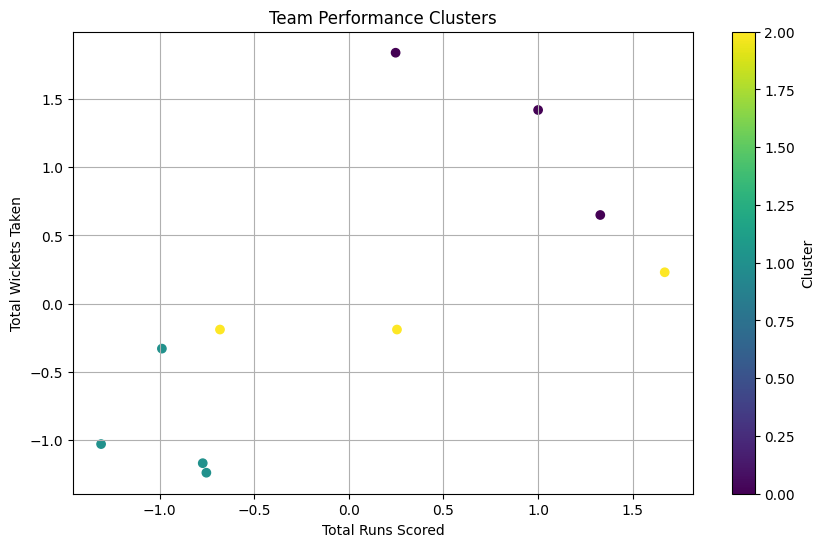

In [16]:
# Choose the number of clusters (you can experiment with different values)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
team_scaled_df['cluster'] = kmeans.fit_predict(team_scaled_df[['runs', 'wkts', 'runs_per_ball', 'econ']])

# Display the clusters
print(team_scaled_df[['team', 'cluster']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(team_scaled_df['runs'], team_scaled_df['wkts'], c=team_scaled_df['cluster'], cmap='viridis')
plt.xlabel('Total Runs Scored')
plt.ylabel('Total Wickets Taken')
plt.title('Team Performance Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [17]:
# Choose the number of clusters (you can experiment with different values)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
team_scaled_df['cluster'] = kmeans.fit_predict(team_scaled_df[['runs', 'wkts', 'runs_per_ball', 'econ']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
# Display the clusters
print(team_scaled_df[['team', 'cluster']])


  team  cluster
0  AFG        1
1  AUS        0
2  BAN        1
3  ENG        2
4  IND        0
5  NED        1
6   NZ        2
7  PAK        2
8   SA        0
9   SL        1


Based on the clustering results, we have grouped the 10 teams into 3 clusters. Each cluster represents teams with similar performance metrics in terms of runs scored, wickets taken, runs per ball, and economy rate.

Cluster 0: Contains teams with similar performance characteristics (Australia, India, South Africa).

Cluster 1: Contains teams with similar performance characteristics (Afghanistan, Bangladesh, Netherlands, Sri Lanka).

Cluster 2: Contains teams with similar performance characteristics (England, New Zealand, Pakistan).

In [21]:
# Calculate average metrics for each cluster
cluster_avg = team_scaled_df.groupby('cluster')[['runs', 'wkts', 'runs_per_ball', 'econ']].mean()
print("Average Metrics for Each Cluster:")
print(cluster_avg)


Average Metrics for Each Cluster:
             runs      wkts  runs_per_ball      econ
cluster                                             
0        0.859247  1.302648       0.467477 -1.196484
1       -0.955438 -0.940284      -1.068135  0.474699
2        0.414671 -0.048937       0.956703  0.563553


In [22]:
# Calculate centroids for each cluster
cluster_centroids = kmeans.cluster_centers_
print("\nCluster Centroids:")
print(cluster_centroids)



Cluster Centroids:
[[ 0.85924693  1.30264815  0.46747692 -1.19648392]
 [-0.95543845 -0.94028359 -1.06813482  0.4746985 ]
 [ 0.414671   -0.04893669  0.95670283  0.56355258]]


<ipython-input-26-8b12512eff25>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(team_scaled_df.loc[i, 'runs'], team_scaled_df.loc[i, 'wkts'], label=None, c=colors[cluster], cmap='viridis', s=100)
<ipython-input-26-8b12512eff25>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter([], [], c=colors[i], label=f'Cluster {i}', cmap='viridis', s=100)


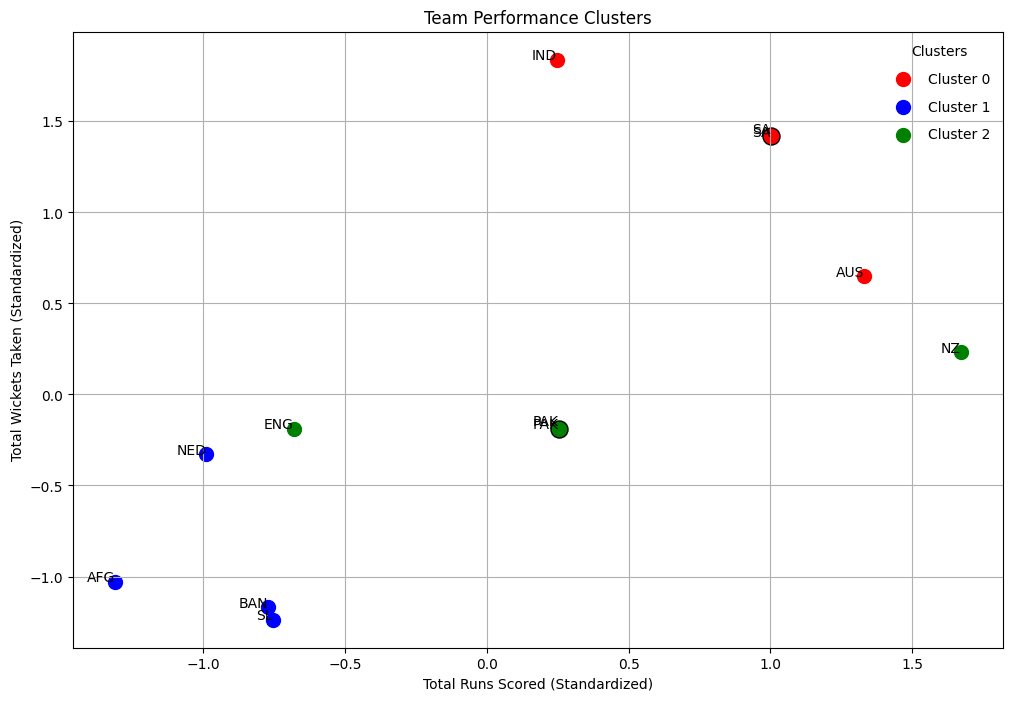

In [26]:
import matplotlib.pyplot as plt

# Create a scatter plot with team names labeled by clusters
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = ['red', 'blue', 'green']

# Scatter plot with all team names labeled by clusters
for i, team in enumerate(team_scaled_df['team']):
    cluster = team_scaled_df.loc[i, 'cluster']
    plt.scatter(team_scaled_df.loc[i, 'runs'], team_scaled_df.loc[i, 'wkts'], label=None, c=colors[cluster], cmap='viridis', s=100)
    plt.text(team_scaled_df.loc[i, 'runs'], team_scaled_df.loc[i, 'wkts'], team, fontsize=10, ha='right')

# Highlight specific team names (e.g., PAK, SA)
highlight_teams = ['PAK', 'SA']
for team in highlight_teams:
    idx = team_scaled_df[team_scaled_df['team'] == team].index[0]
    cluster = team_scaled_df.loc[idx, 'cluster']
    plt.scatter(team_scaled_df.loc[idx, 'runs'], team_scaled_df.loc[idx, 'wkts'], label=None, c=colors[cluster], s=150, edgecolors='black')
    plt.text(team_scaled_df.loc[idx, 'runs'], team_scaled_df.loc[idx, 'wkts'], team, fontsize=10, ha='right', va='bottom')

# Add labels and title
plt.xlabel('Total Runs Scored (Standardized)')
plt.ylabel('Total Wickets Taken (Standardized)')
plt.title('Team Performance Clusters')

# Show the legend with cluster colors
for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label=f'Cluster {i}', cmap='viridis', s=100)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Clusters')

# Show the plot
plt.grid(True)
plt.show()


So, INDIA AUSTRALIA and SA are top performed team

In [30]:
data=df
import seaborn as sns

TEAMS based on total runs

and based on total wikets

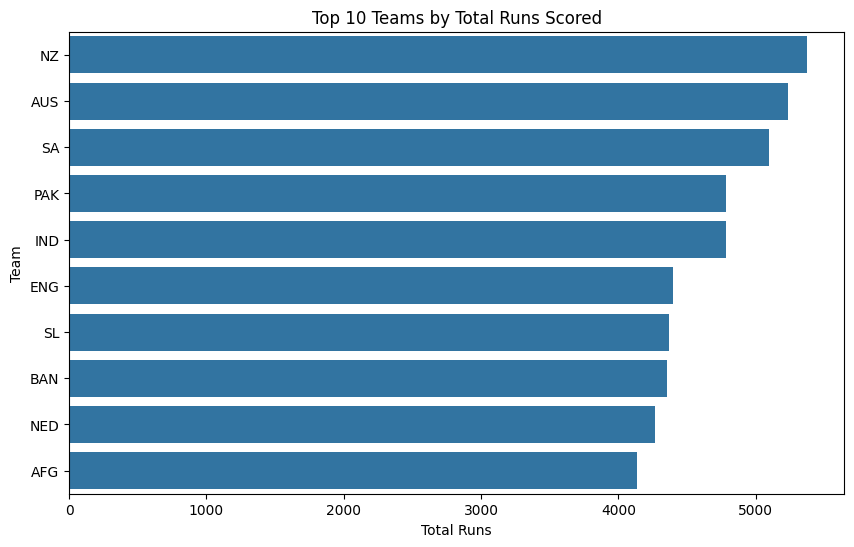

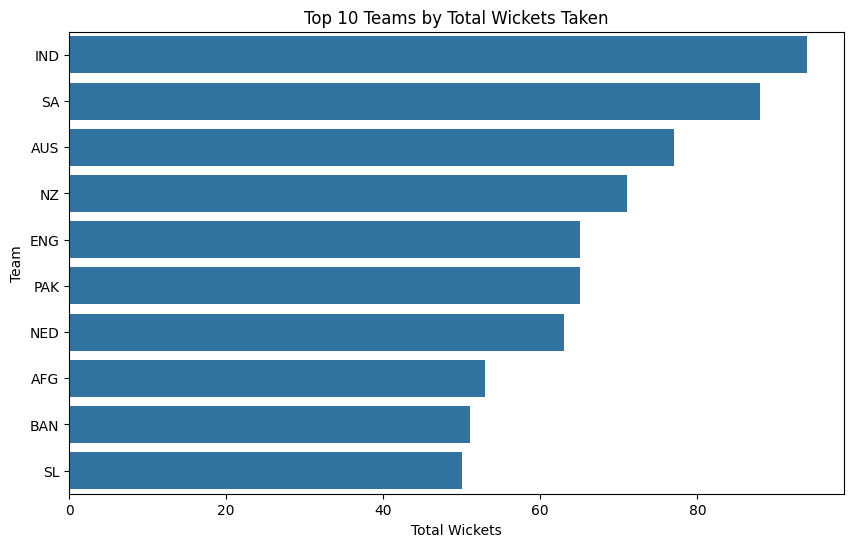

In [32]:
# Calculate team-wise total runs scored
team_runs = data.groupby('team')['runs'].sum().reset_index().sort_values(by='runs', ascending=False)

# Calculate team-wise total wickets taken
team_wickets = data.groupby('team')['wkts'].sum().reset_index().sort_values(by='wkts', ascending=False)

# Plotting top 10 teams by runs scored
plt.figure(figsize=(10, 6))
sns.barplot(x='runs', y='team', data=team_runs.head(10))
plt.xlabel('Total Runs')
plt.ylabel('Team')
plt.title('Top 10 Teams by Total Runs Scored')
plt.show()

# Plotting top 10 teams by wickets taken
plt.figure(figsize=(10, 6))
sns.barplot(x='wkts', y='team', data=team_wickets.head(10))
plt.xlabel('Total Wickets')
plt.ylabel('Team')
plt.title('Top 10 Teams by Total Wickets Taken')
plt.show()


Batting and Bowling Styles of Each Team

To analyze the batting and bowling styles, we can look at the average strike rate (for batting) and average economy rate (for bowling) for each team:

<ipython-input-33-4fc3a058f4e2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sr', y='team', data=team_avg_strike_rate, palette='rocket')


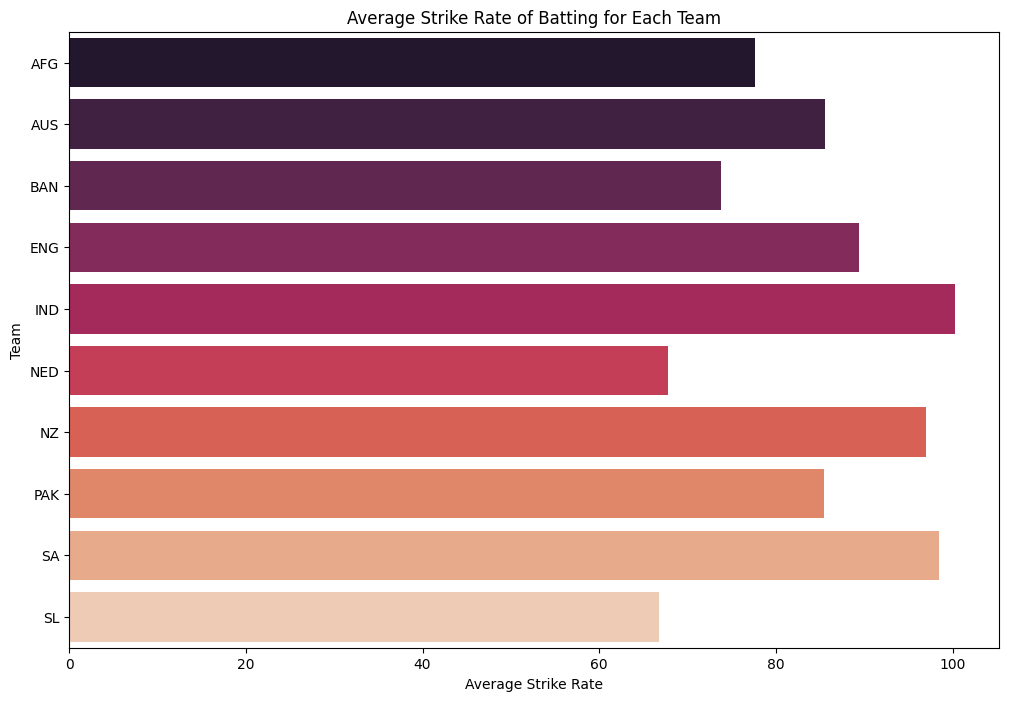

<ipython-input-33-4fc3a058f4e2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='econ', y='team', data=team_avg_economy_rate, palette='cividis')


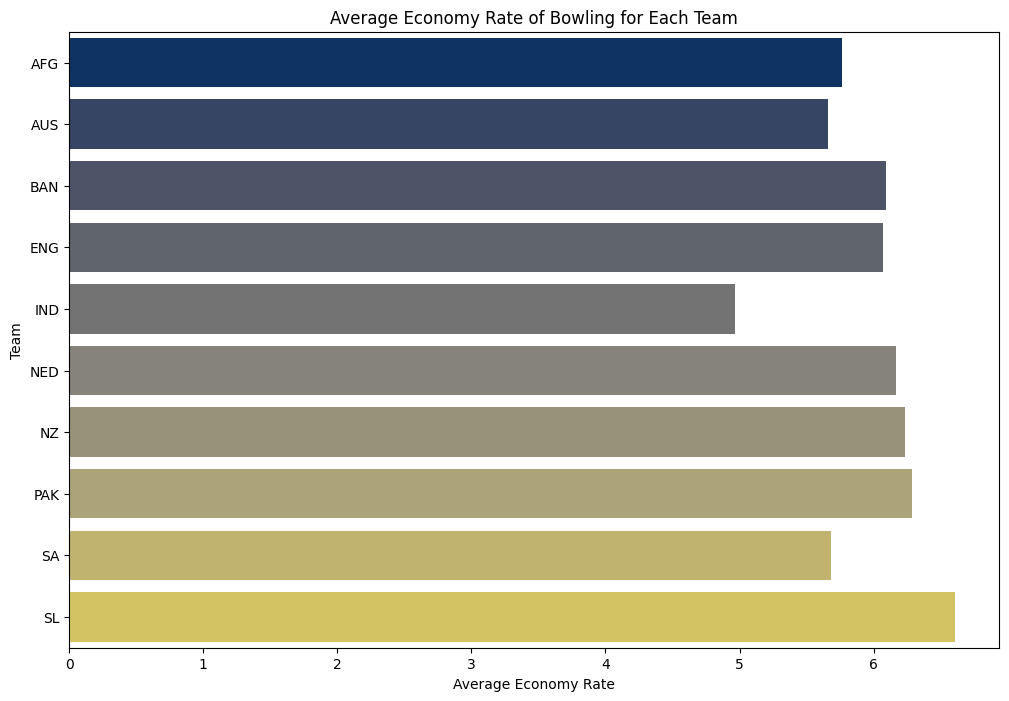

In [33]:
# Calculate average strike rate for batting and average economy rate for bowling for each team
team_avg_strike_rate = data[data['bat_or_bowl'] == 'bat'].groupby('team')['sr'].mean().reset_index()
team_avg_economy_rate = data[data['bat_or_bowl'] == 'bowl'].groupby('team')['econ'].mean().reset_index()

# Plotting average strike rate of batting for each team
plt.figure(figsize=(12, 8))
sns.barplot(x='sr', y='team', data=team_avg_strike_rate, palette='rocket')
plt.xlabel('Average Strike Rate')
plt.ylabel('Team')
plt.title('Average Strike Rate of Batting for Each Team')
plt.show()

# Plotting average economy rate of bowling for each team
plt.figure(figsize=(12, 8))
sns.barplot(x='econ', y='team', data=team_avg_economy_rate, palette='cividis')
plt.xlabel('Average Economy Rate')
plt.ylabel('Team')
plt.title('Average Economy Rate of Bowling for Each Team')
plt.show()


#Task 2. Player Performance Analysis

Player Performance Analysis:

Leading Run-Scorers:


Calculate the total runs scored by each player.
Plot a bar chart to visualize the leading run-scorers.

> Add blockquote



<ipython-input-34-7ea712dbf430>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runs', y='player', data=player_total_runs.head(10), palette='mako')


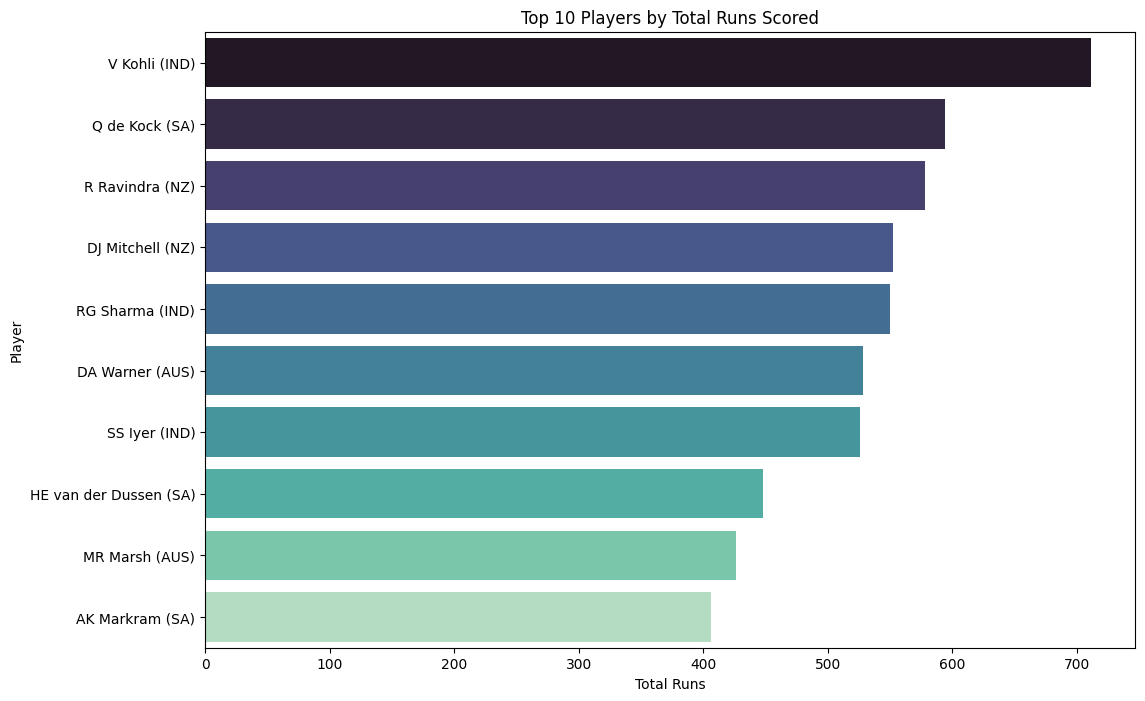

In [34]:
# Calculate total runs scored by each player
player_total_runs = data[data['bat_or_bowl'] == 'bat'].groupby('player')['runs'].sum().reset_index().sort_values(by='runs', ascending=False)

# Plotting total runs scored by each player
plt.figure(figsize=(12, 8))
sns.barplot(x='runs', y='player', data=player_total_runs.head(10), palette='mako')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.title('Top 10 Players by Total Runs Scored')
plt.show()


Leading Wicket-Takers:


Calculate the total wickets taken by each player.

Plot a bar chart to visualize the leading wicket-takers.

<ipython-input-35-04a2f59acd0d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wkts', y='player', data=player_total_wickets.head(10), palette='viridis')


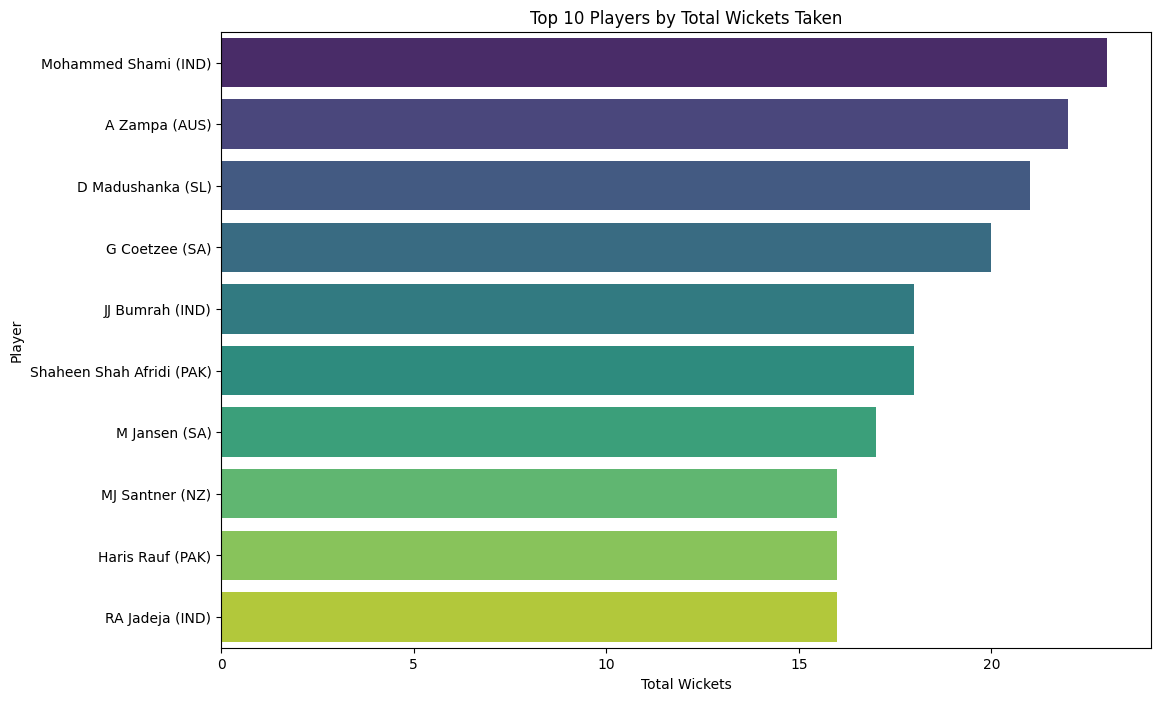

In [35]:
# Calculate total wickets taken by each player
player_total_wickets = data[data['bat_or_bowl'] == 'bowl'].groupby('player')['wkts'].sum().reset_index().sort_values(by='wkts', ascending=False)

# Plotting total wickets taken by each player
plt.figure(figsize=(12, 8))
sns.barplot(x='wkts', y='player', data=player_total_wickets.head(10), palette='viridis')
plt.xlabel('Total Wickets')
plt.ylabel('Player')
plt.title('Top 10 Players by Total Wickets Taken')
plt.show()


Assessing Impact on Team's Performance:


To assess the impact of players on their team's performance, we can calculate metrics such as average runs scored per match (for batting) and average wickets taken per match (for bowling).


We'll plot these to visualize the impact.

<ipython-input-36-fd51ede75917>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runs', y='player', data=player_avg_runs.head(10), palette='rocket')


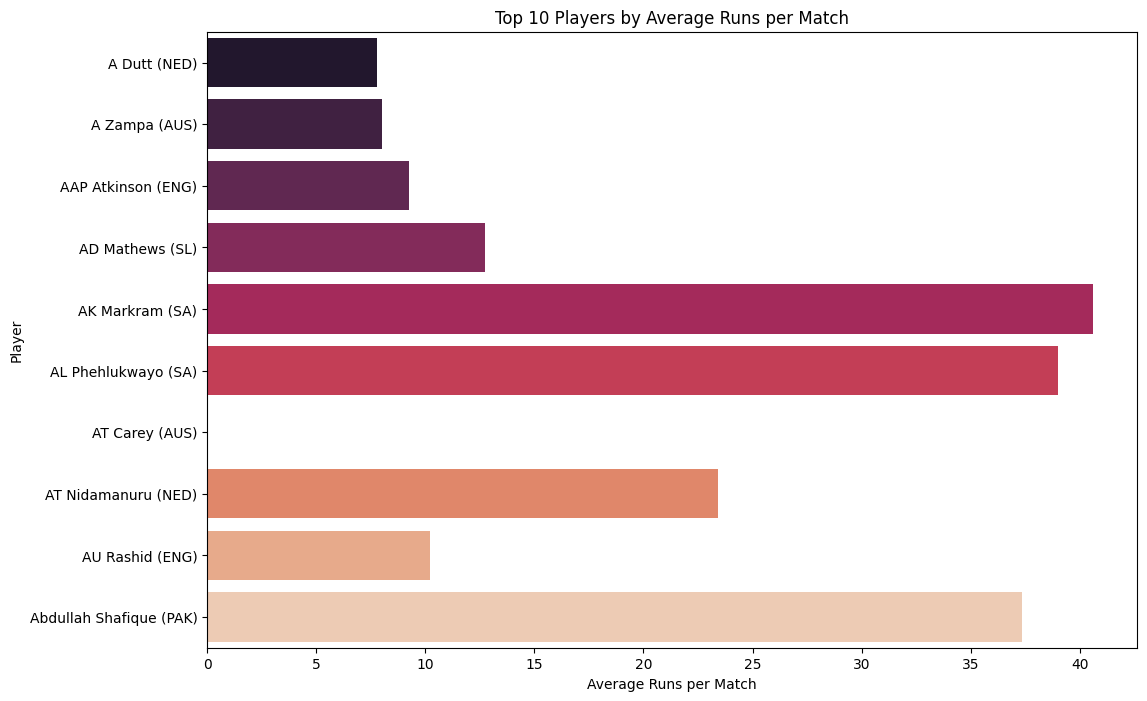

<ipython-input-36-fd51ede75917>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wkts', y='player', data=player_avg_wickets.head(10), palette='cividis')


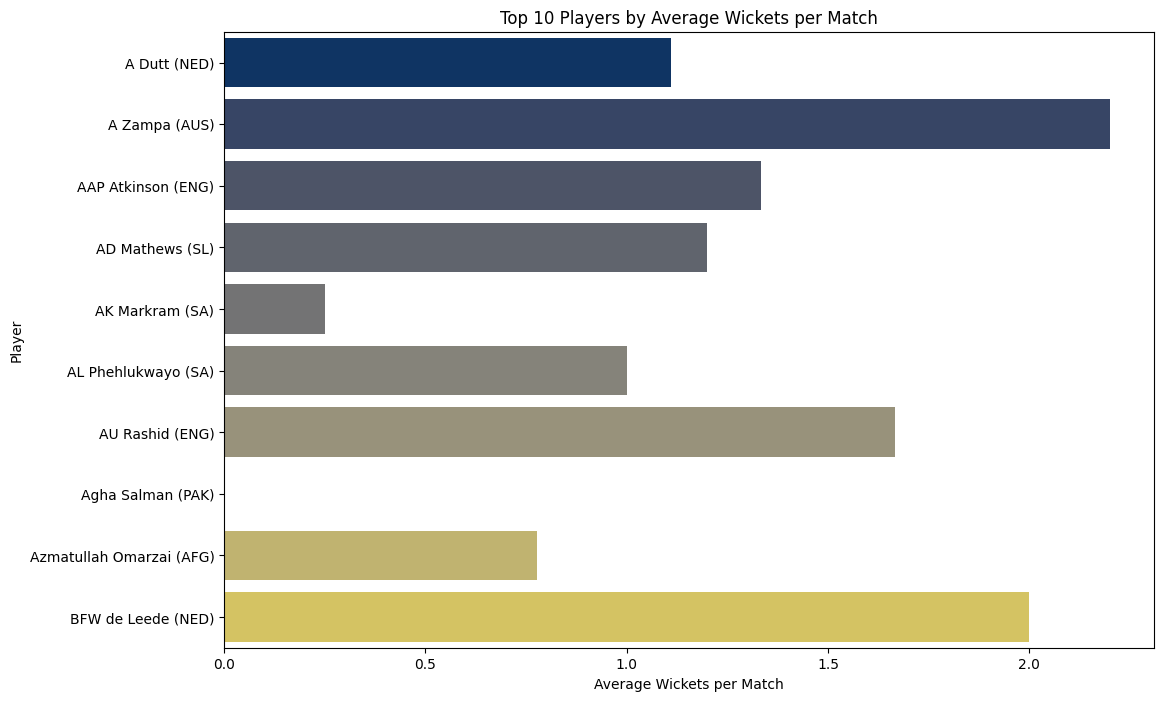

In [36]:
# Calculate average runs per match for each player
player_avg_runs = data[data['bat_or_bowl'] == 'bat'].groupby('player')['runs'].mean().reset_index()

# Calculate average wickets per match for each player
player_avg_wickets = data[data['bat_or_bowl'] == 'bowl'].groupby('player')['wkts'].mean().reset_index()

# Plotting average runs per match for each player
plt.figure(figsize=(12, 8))
sns.barplot(x='runs', y='player', data=player_avg_runs.head(10), palette='rocket')
plt.xlabel('Average Runs per Match')
plt.ylabel('Player')
plt.title('Top 10 Players by Average Runs per Match')
plt.show()

# Plotting average wickets per match for each player
plt.figure(figsize=(12, 8))
sns.barplot(x='wkts', y='player', data=player_avg_wickets.head(10), palette='cividis')
plt.xlabel('Average Wickets per Match')
plt.ylabel('Player')
plt.title('Top 10 Players by Average Wickets per Match')
plt.show()
